# Meta Data Anaysis

I am performing some EDA work on my browser history!

Extract & prepare your history dataset using: 
preparation_BrowserHistory.ipynb

In [149]:
import pandas as pd
import matplotlib.pyplot as plt

In [150]:
df_history = pd.read_csv('/Users/senakshikrishnamurthy/Desktop/DS/602_ML/history_cleaned.csv')
df_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Timestamp  3834 non-null   object
 1   domain     3834 non-null   object
dtypes: object(2)
memory usage: 60.0+ KB


In [151]:
df_history.head()

,Timestamp,domain
0,2025-02-10 09:57:37,chatgpt.com
1,2025-02-10 09:57:13,chatgpt.com
2,2025-02-10 09:53:18,open.spotify.com
3,2025-02-10 09:40:02,stackoverflow.com
4,2025-02-10 09:39:52,www.google.com


In [152]:
df_history.isna().sum()

Timestamp    0
domain       0
dtype: int64

In [153]:
df_history.dropna( inplace=True)

In [154]:
# Displaying min and max dates
print(df_history['Timestamp'].min(), df_history['Timestamp'].max())

# Identify out-of-bounds values
out_of_bounds = df_history[(df_history['Timestamp'] < '1677-09-21') | 
                           (df_history['Timestamp'] > '2262-04-11')]
out_of_bounds

1600-12-31 19:00:00 2025-02-10 09:57:37


,Timestamp,domain
3824,1600-12-31 19:00:00,dramacool.com.tr
3825,1600-12-31 19:00:00,www.usvisascheduling.com
3826,1600-12-31 19:00:00,github.com
3827,1600-12-31 19:00:00,careers.compassgroupcareers.com
3828,1600-12-31 19:00:00,chromewebstore.google.com
3829,1600-12-31 19:00:00,www.sql-practice.com
3830,1600-12-31 19:00:00,www.datascienceglossary.org
3831,1600-12-31 19:00:00,www.geeksforgeeks.org
3832,1600-12-31 19:00:00,www.citationmachine.net
3833,1600-12-31 19:00:00,www.arcgis.com


In [155]:
#cleaning the out of bounds values
df_history_cleaned = df_history[(df_history['Timestamp'] >= '1677-09-21') & 
                        (df_history['Timestamp'] <= '2262-04-11')]

out_of_bounds = df_history_cleaned[(df_history_cleaned['Timestamp'] < '1677-09-21') | 
                           (df_history_cleaned['Timestamp'] > '2262-04-11')]
out_of_bounds

,Timestamp,domain


In [156]:
df_history_cleaned.head()

,Timestamp,domain
0,2025-02-10 09:57:37,chatgpt.com
1,2025-02-10 09:57:13,chatgpt.com
2,2025-02-10 09:53:18,open.spotify.com
3,2025-02-10 09:40:02,stackoverflow.com
4,2025-02-10 09:39:52,www.google.com


In [157]:
print(df_history_cleaned['Timestamp'].isna().sum())  # Count NaT values


0


In [158]:
# Converting the 'Timestamp' column to datetime format
df = df_history_cleaned.copy()
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [159]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3824 entries, 0 to 3823
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  3824 non-null   datetime64[ns]
 1   domain     3824 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 89.6+ KB


,Timestamp,domain
0,2025-02-10 09:57:37,chatgpt.com
1,2025-02-10 09:57:13,chatgpt.com
2,2025-02-10 09:53:18,open.spotify.com
3,2025-02-10 09:40:02,stackoverflow.com
4,2025-02-10 09:39:52,www.google.com


In [160]:
df['domain'].value_counts()[:50]

domain
www.google.com                  595
www.netflix.com                 462
mail.google.com                 449
www.linkedin.com                236
www.youtube.com                 135
accounts.google.com              79
open.spotify.com                 75
secure2.bge.com                  63
github.com                       60
dramacool.bg                     58
secure.bge.com                   53
secure.ssa.gov                   47
webauth.umbc.edu                 45
www.googleadservices.com         44
www.target.com                   39
chatgpt.com                      39
api-4f567d87.duosecurity.com     36
localhost:8888                   33
m.facebook.com                   32
www.amazon.com                   31
www.apple.com                    29
umbc.academicworks.com           28
www.amazon.jobs                  27
auth.openai.com                  27
blackboard.umbc.edu              27
campus-americas.icims.com        26
www.bestbuy.com                  25
meet.google.com      

<Axes: ylabel='domain'>

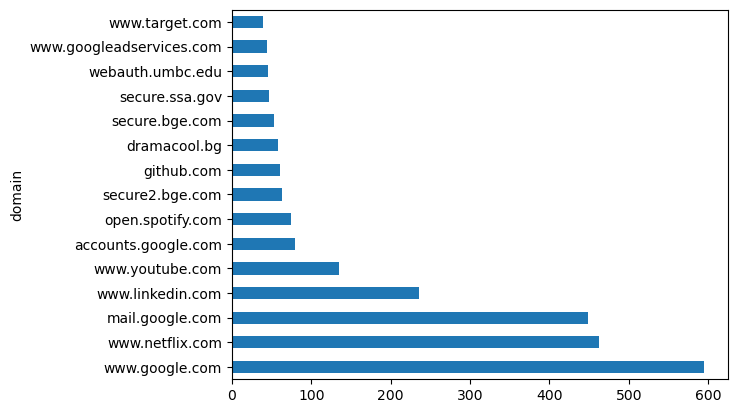

In [161]:
#  15 sites that I visisted the most
df['domain'].value_counts()[:15].plot(kind='barh')

In [162]:
# counting the times I visited a site at a particular hour
hourly_counts = df.groupby(df.Timestamp.dt.hour).domain.size()
hourly_counts

Timestamp
0      94
1      30
2      12
3       8
4      29
5       4
6      54
7      66
8      89
9     120
10    176
11    273
12    283
13    312
14    241
15    223
16    239
17    214
18    188
19    213
20    191
21    182
22    259
23    324
Name: domain, dtype: int64

<Axes: xlabel='Timestamp'>

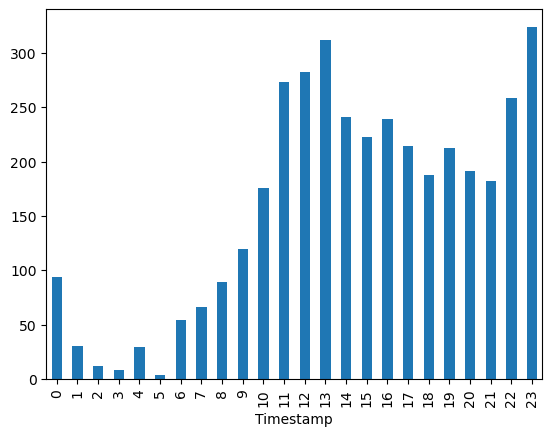

In [163]:
hourly_counts.plot.bar()

In [164]:
# dividing the dates to days

df['Day'] = [ d.day_name() for d in df['Timestamp']]
df['DayIndex'] = [ d.dayofweek for d in df['Timestamp']]
df.head()

,Timestamp,domain,Day,DayIndex
0,2025-02-10 09:57:37,chatgpt.com,Monday,0
1,2025-02-10 09:57:13,chatgpt.com,Monday,0
2,2025-02-10 09:53:18,open.spotify.com,Monday,0
3,2025-02-10 09:40:02,stackoverflow.com,Monday,0
4,2025-02-10 09:39:52,www.google.com,Monday,0


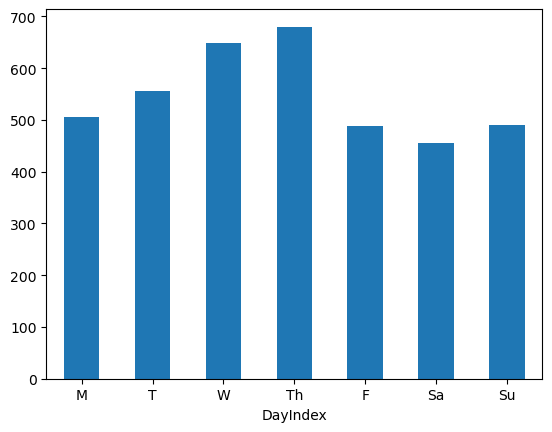

In [165]:
# maximum number of visits in a day 
days = df['DayIndex'].value_counts().sort_index()
days.plot(kind='bar')
plt.xticks(days.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)
plt.show()

In [166]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Timestamp,domain,Day,DayIndex,isWeekend
0,2025-02-10 09:57:37,chatgpt.com,Monday,0,False
1,2025-02-10 09:57:13,chatgpt.com,Monday,0,False
2,2025-02-10 09:53:18,open.spotify.com,Monday,0,False
3,2025-02-10 09:40:02,stackoverflow.com,Monday,0,False
4,2025-02-10 09:39:52,www.google.com,Monday,0,False


In [167]:
df_weekend = df[ df['isWeekend'] == True ]

df_weekday = df[ df['isWeekend'] == False ]

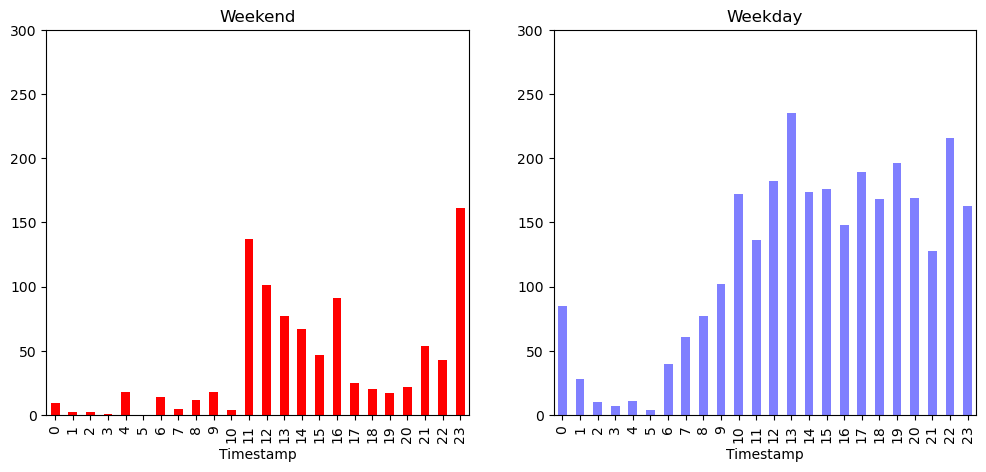

In [168]:
def show_stats(df, color, alpha=1, title='', fig=None):
    hourly_counts = df.groupby(df.Timestamp.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.title(title)
    plt.ylim([0, 300])
    

plt.figure(figsize=(12, 5))
show_stats( df_weekend, 'red', 1, 'Weekend', 1)
    
show_stats( df_weekday, 'blue', 0.5, 'Weekday', 2)

plt.show()

It does shoes that I'm using my computer more on weekdays comapapred to weekend but the ratio doesnt match due to number of day vary

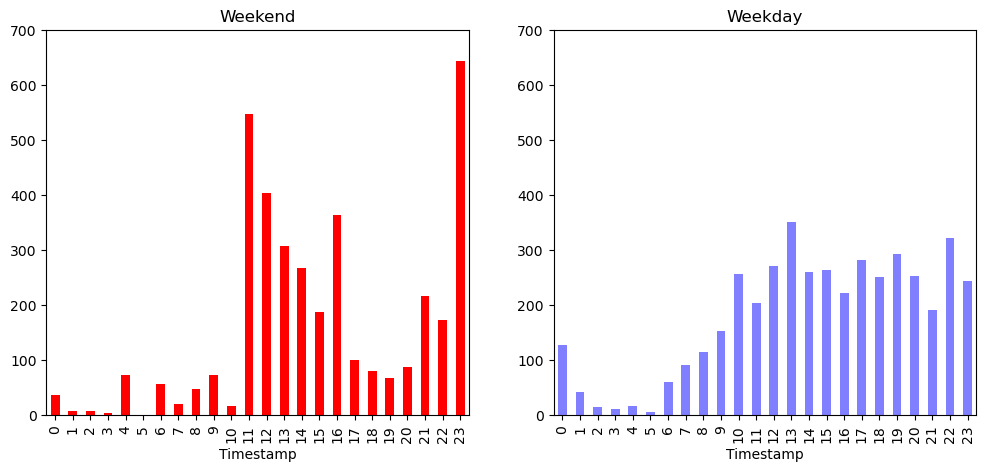

In [169]:
# matching the lost  hours with the days
import warnings as warnings
ignore_warnings = warnings.filterwarnings('ignore')

def show_stats(df, color, alpha=1, title='', fig=None, y_lim = None):
    hourly_counts = df.groupby(df.Timestamp.dt.hour).domain.size()
    
    days_counts = df.Timestamp.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts #  multiplied by 100.0 to make it float so as not to loose decimals
           
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)


plt.figure(figsize=(12, 5))

y_lim=[0, 700]
show_stats(df_weekend, 'red', 1, 'Weekend',fig=1, y_lim=y_lim)
    
show_stats(df_weekday, 'blue', 0.5, 'Weekday',fig=2, y_lim=y_lim)


<Axes: ylabel='domain'>

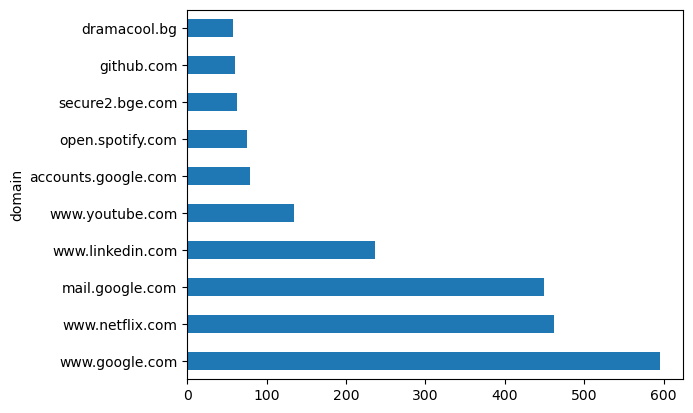

In [170]:
# Anaysis based on sites visited
df['domain'].value_counts()[:10].plot(kind='barh')

In [171]:
# creatting a def to show the stats

def get_data_for_domain(val):
    return df[df['domain'].str.lower().str.contains(val.lower(), regex=True)]

In [172]:
# for illustraing the above def

def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

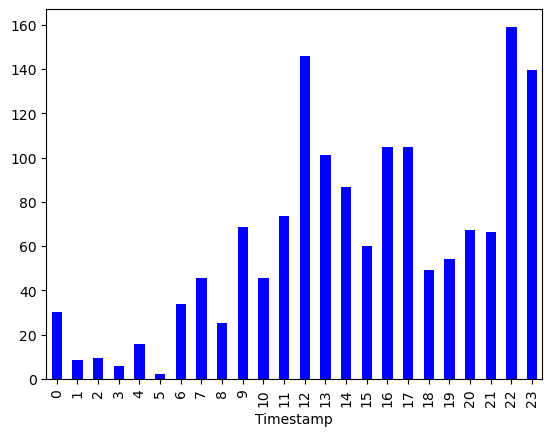

In [173]:
_= show_domain_stats('google', 'blue')

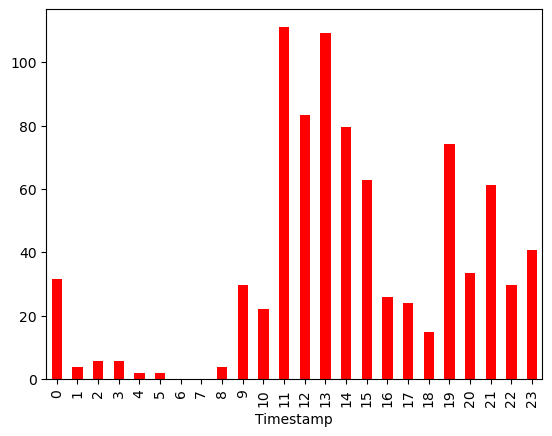

In [174]:
_= show_domain_stats('netflix', 'red')

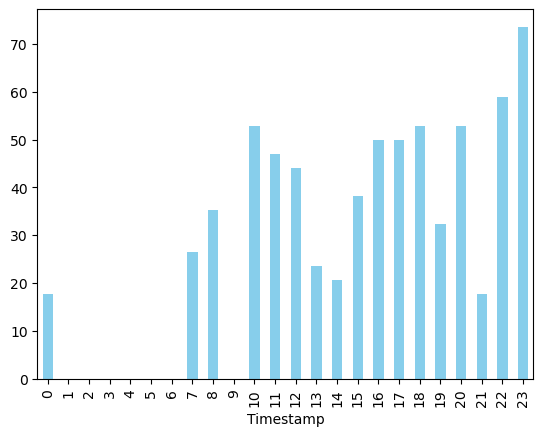

In [175]:
_= show_domain_stats('linkedin', 'skyblue')

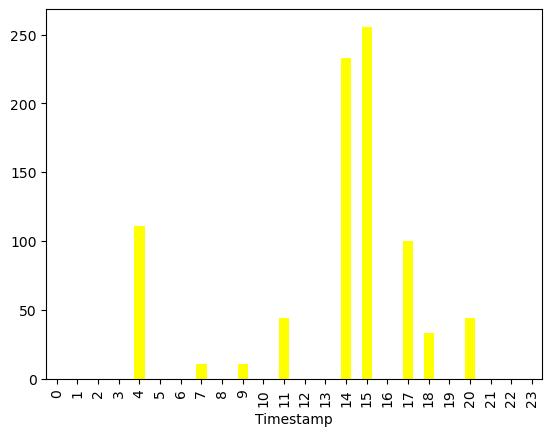

In [176]:
_= show_domain_stats('spotify', 'yellow')

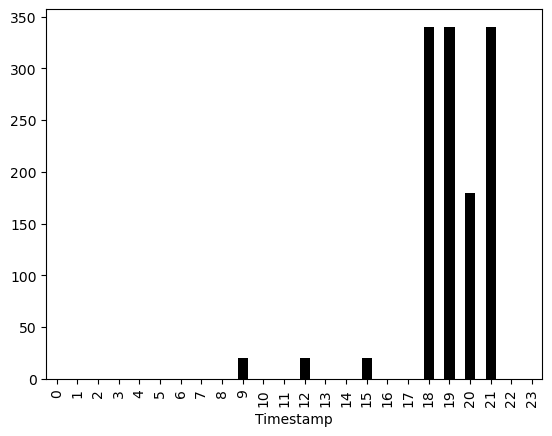

In [177]:
_= show_domain_stats('github', 'black')

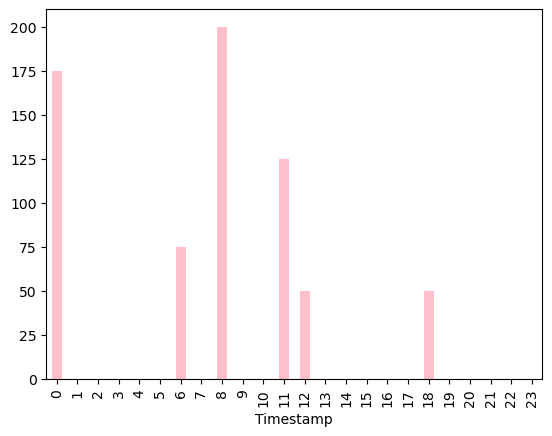

In [178]:
_ = show_domain_stats('blackboard', 'pink')

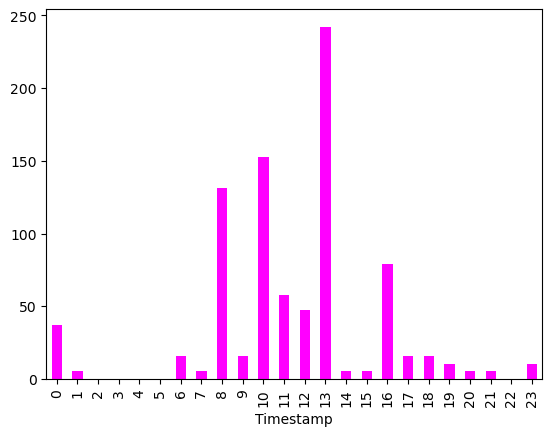

In [179]:
_ = show_domain_stats('umbc', 'magenta')

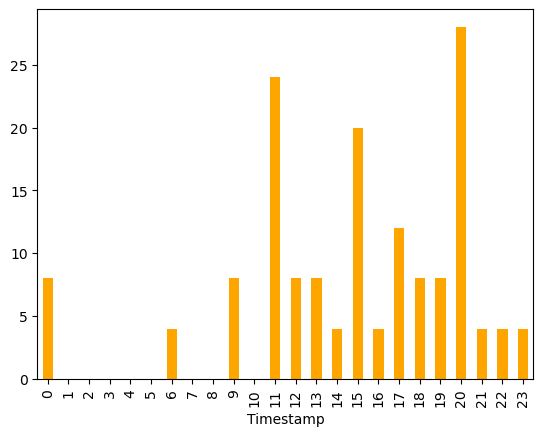

In [180]:
_ = show_domain_stats('chatgpt', 'orange')

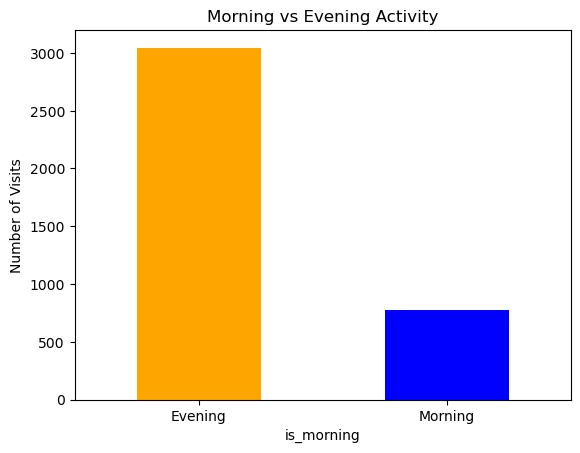

In [181]:
# morning (6 AM to 12 PM) and evening (6 PM to 12 AM)
df['is_morning'] = df['Timestamp'].dt.hour.between(6, 12, inclusive='left')

# compare morning vs evening
morning_evening_counts = df['is_morning'].value_counts()

# plot morning vs evening activity
colors = ['orange', 'blue']
morning_evening_counts.plot(kind='bar', color= colors)
plt.xticks([0, 1], ['Evening', 'Morning'], rotation=0)
plt.title('Morning vs Evening Activity')
plt.ylabel('Number of Visits')
plt.show()

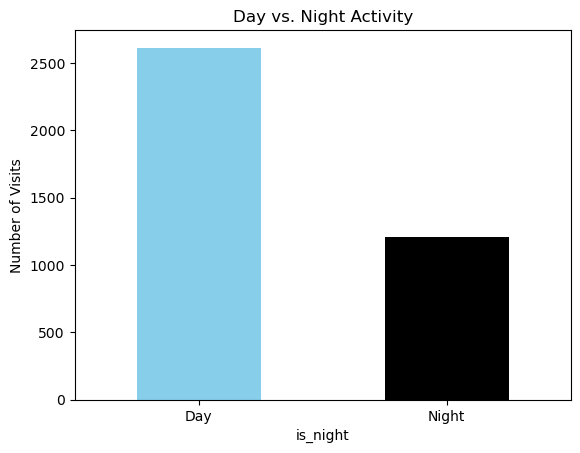

In [146]:
df['is_night'] = df['Timestamp'].dt.hour.between(18, 23, inclusive='left') | df['Timestamp'].dt.hour.between(0, 5)
day_night_counts = df['is_night'].value_counts()
day_night_counts.plot(kind='bar')
colors = ['Skyblue', 'black']  # Assign colors: blue for Day, orange for Night
day_night_counts.plot(kind='bar', color=colors)
plt.xticks([0, 1], ['Day', 'Night'], rotation=0)
plt.title('Day vs. Night Activity')
plt.ylabel('Number of Visits')
plt.show()

In [147]:
#session length calculation
import pandas as pd
df = df.sort_values(by='Timestamp')# ensure data is sorted by Timpestamp
df['time_diff'] = df['Timestamp'].diff()# calculate time differences between consecutive entries
session_threshold = pd.Timedelta(minutes=30)# defining session threshold as 30 minutes
df['new_session'] = df['time_diff'] > session_threshold# creating a new session if the time difference exceeds the threshold
df['session_id'] = df['new_session'].cumsum()# assigning session IDs by cumulatively summing the new session indicator
df[['Timestamp', 'time_diff', 'new_session', 'session_id']].head()# check the results

,Timestamp,time_diff,new_session,session_id
3823,2024-09-10 14:30:05,NaT,False,0
3820,2024-09-10 14:30:05,0 days 00:00:00,False,0
3822,2024-09-10 14:30:05,0 days 00:00:00,False,0
3821,2024-09-10 14:30:05,0 days 00:00:00,False,0
3819,2024-10-22 10:04:59,41 days 19:34:54,True,1


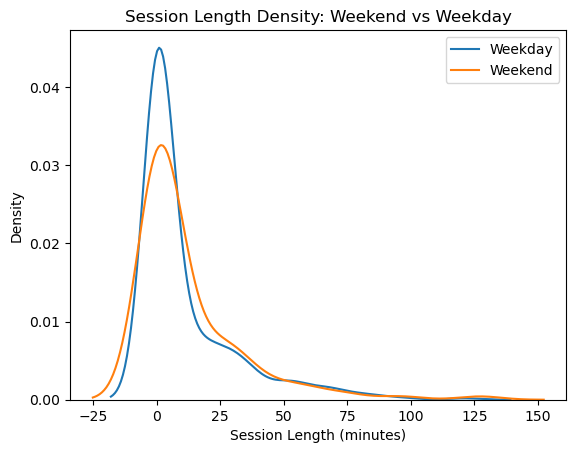

In [148]:
# compare session length for weekend vs weekday
import seaborn as sns
weekend_sessions = df[df['isWeekend']].groupby('session_id')['Timestamp'].agg(['min', 'max'])
weekday_sessions = df[~df['isWeekend']].groupby('session_id')['Timestamp'].agg(['min', 'max'])
weekend_sessions['session_length'] = (weekend_sessions['max'] - weekend_sessions['min']).dt.total_seconds() / 60
weekday_sessions['session_length'] = (weekday_sessions['max'] - weekday_sessions['min']).dt.total_seconds() / 60
sns.kdeplot(weekday_sessions['session_length'], label='Weekday', shade=False)
sns.kdeplot(weekend_sessions['session_length'], label='Weekend', shade=False)
plt.title('Session Length Density: Weekend vs Weekday')
plt.xlabel('Session Length (minutes)')
plt.ylabel('Density')
plt.legend()
plt.show()


## Conclusion
### Based on data, what can we tell about this person?

1. Is this a work computer or personal computer?

* The combination of personal websites like YouTube, Netflix,Apple and Spotify with job-related ones like LinkedIn, Blackboard (UMBC), MyUMBC,chatgpt and Github indicates that this is probably a personal computer used for both work and play. When professionals or students use the same device to balance business and personal chores, this type of overlap is typical.

2. Is the user employed?

* The user may be actively seeking internships or employment based on their frequent visits to LinkedIn and Handshake, a job search network.
* The user's current enrollment in a university program is shown by visits to the UMBC-specific domains, MyUMBC, and Blackboard (UMBC).

3. What are the user's interests?

* Professional Growth: Frequent visits to LinkedIn,chatgpt  suggest a strong interest in professional development, programming skills, and job opportunities.
* Entertainment: Visits to YouTube, Netflix, and Dramacool.net indicate the user enjoys watching videos and movies. Spotify indicates that the user loves to listen songs
* Shopping: Sites like Amazon, Flipkart, Walmart And Target indicate an interest in online shopping.
* Education: Regular usage of Courseera,Overleaf, and educational platforms (likely for skill enhancement) shows an interest in continuous learning.

4. Anything interesting?

* Balanced Usage: The user shows a mix of job searching, educational content, and entertainment, which suggests a well-rounded usage pattern.